In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn import metrics

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [3]:
train.head()

,ID,Date,Opponent,Is_Home_or_Away,Is_Opponent_in_AP25_Preseason,Media,Label
0,1,9/5/2015,Texas,Home,Out,1-NBC,Win
1,2,9/12/2015,Virginia,Away,Out,4-ABC,Win
2,3,9/19/2015,GeorgiaTech,Home,In,1-NBC,Win
3,4,9/26/2015,UMass,Home,Out,1-NBC,Win
4,5,10/3/2015,Clemson,Away,In,4-ABC,Lose


In [4]:
test.head()

,ID,Date,Opponent,Is_Home_or_Away,Is_Opponent_in_AP25_Preseason,Media,Label
0,25,9/2/2017,Temple,Home,Out,1-NBC,Win
1,26,9/9/2017,Georgia,Home,In,1-NBC,Lose
2,27,9/16/2017,BostonCollege,Away,Out,2-ESPN,Win
3,28,9/23/2017,MichiganState,Away,Out,3-FOX,Win
4,29,9/30/2017,MiamiOhio,Home,Out,1-NBC,Win


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ID                             24 non-null     int64 
 1   Date                           24 non-null     object
 2   Opponent                       24 non-null     object
 3   Is_Home_or_Away                24 non-null     object
 4   Is_Opponent_in_AP25_Preseason  24 non-null     object
 5   Media                          24 non-null     object
 6   Label                          24 non-null     object
dtypes: int64(1), object(6)
memory usage: 832.0+ bytes


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ID                             12 non-null     int64 
 1   Date                           12 non-null     object
 2   Opponent                       12 non-null     object
 3   Is_Home_or_Away                12 non-null     object
 4   Is_Opponent_in_AP25_Preseason  12 non-null     object
 5   Media                          12 non-null     object
 6   Label                          12 non-null     object
dtypes: int64(1), object(6)
memory usage: 448.0+ bytes


In [7]:
train = train.drop(['ID', 'Date', 'Opponent'], axis='columns')

In [8]:
train.head()

,Is_Home_or_Away,Is_Opponent_in_AP25_Preseason,Media,Label
0,Home,Out,1-NBC,Win
1,Away,Out,4-ABC,Win
2,Home,In,1-NBC,Win
3,Home,Out,1-NBC,Win
4,Away,In,4-ABC,Lose


In [9]:
# Categorical values need to be transformed into numeric.
train['Is_Home_or_Away'] = train['Is_Home_or_Away'].map( {'Away': 0, 'Home': 1} ).astype(int)
train['Is_Opponent_in_AP25_Preseason'] = train['Is_Opponent_in_AP25_Preseason'].map( {'Out': 0, 'In': 1} ).astype(int)
train['Label'] = train['Label'].map( {'Lose': 0, 'Win': 1} ).astype(int)
train['Media'] = train['Media'].map( {'1-NBC': 0,'2-ESPN': 1,'3-FOX': 2,'4-ABC': 3,'5-CBS': 4} ).astype(int)

In [10]:
# Categorical values need to be transformed into numeric.
test['Is_Home_or_Away'] = test['Is_Home_or_Away'].map( {'Away': 0, 'Home': 1} ).astype(int)
test['Is_Opponent_in_AP25_Preseason'] = test['Is_Opponent_in_AP25_Preseason'].map( {'Out': 0, 'In': 1} ).astype(int)
test['Label'] = test['Label'].map( {'Lose': 0, 'Win': 1} ).astype(int)
test['Media'] = test['Media'].map( {'1-NBC': 0,'2-ESPN': 1,'3-FOX': 2,'4-ABC': 3,'5-CBS': 4} ).astype(int)

In [11]:
test = test.drop(['ID', 'Date', 'Opponent'], axis='columns')

In [12]:
test.head()

,Is_Home_or_Away,Is_Opponent_in_AP25_Preseason,Media,Label
0,1,0,0,1
1,1,1,0,0
2,0,0,1,1
3,0,0,2,1
4,1,0,0,1


In [13]:
train.head()

,Is_Home_or_Away,Is_Opponent_in_AP25_Preseason,Media,Label
0,1,0,0,1
1,0,0,3,1
2,1,1,0,1
3,1,0,0,1
4,0,1,3,0


In [14]:
X = train.drop(['Label'], axis=1)

y = train['Label']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [16]:
X_train.shape, X_test.shape

((16, 3), (8, 3))

In [17]:
gnb = GaussianNB()

In [18]:
gnb.fit(X_train, y_train)

GaussianNB()

In [19]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 1, 1, 1, 0, 0, 1, 0])

In [20]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.6250


In [21]:
print('Model recall score: {0:0.4f}'. format(recall_score(y_test, y_pred)))

Model recall score: 0.6667


In [22]:
print('Model precision score: {0:0.4f}'. format(precision_score(y_test, y_pred)))

Model precision score: 0.5000


In [23]:
F1 = 2*(recall_score(y_test, y_pred) * precision_score(y_test, y_pred)) / (recall_score(y_test, y_pred) + precision_score(y_test, y_pred))
print('Model F1 score: {0:0.4f}'. format(F1))

Model F1 score: 0.5714


In [24]:
test = test.drop(['Label'], axis=1)
test.shape
test.head()

,Is_Home_or_Away,Is_Opponent_in_AP25_Preseason,Media
0,1,0,0
1,1,1,0
2,0,0,1
3,0,0,2
4,1,0,0


In [25]:
test_predictions = gnb.predict(test)

In [26]:
print(test_predictions)

[1 1 0 0 1 0 1 1 1 0 1 0]


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [42]:
X_train.shape

(16, 3)

In [70]:
k_range = range(1,15)
accuracy_scores = []
precision_scores = []
recall_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test,y_pred))
    precision_scores.append(metrics.precision_score(y_test,y_pred))
    recall_scores.append(metrics.recall_score(y_test,y_pred))
print(accuracy_scores)
print(precision_scores)
print(recall_scores)

[0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375]
[1.0, 0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Testing Accuracy')

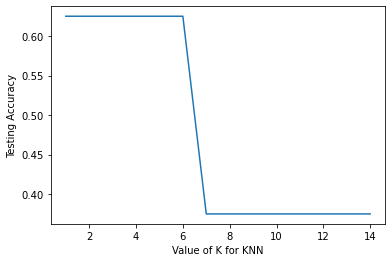

In [69]:
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Precision')

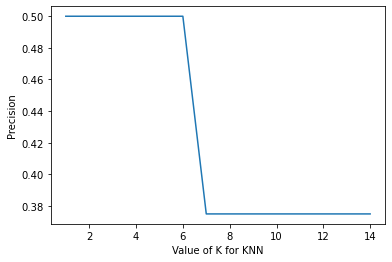

In [73]:
plt.plot(k_range, precision_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Precision')

Text(0, 0.5, 'Recall')

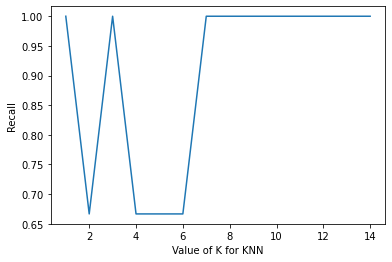

In [74]:
plt.plot(k_range, recall_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Recall')

In [95]:
F1 = 2*(recall_scores[2] * precision_scores[2]) / (recall_scores[2] + precision_scores[2])
print('Model F1 score: {0:0.4f}'. format(F1))

Model F1 score: 0.6667


In [78]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)
y_pred = knn.predict(test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0])